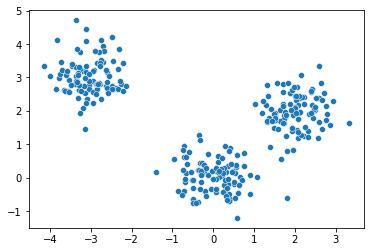

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

x = []  # data
k = 3  # hyper paramters
np.random.seed(2021)
x.extend(np.random.normal(loc=[0,0], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[2,2], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[-3,3], scale=0.5, size=(100, 2)).tolist())
x = np.array(x)

sns.scatterplot(x=x[:,0], y=x[:,1]);

In [9]:
def distance(a, b):
    return sum((a - b) ** 2)/len(a)

def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)

def cluster(x, k, seed=2022, iter_num=25):
    logs = []
    np.random.seed(seed)
    centers = x[np.random.choice(len(x), size=k, replace=False)]
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # find nearest center
        for row in x:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # update center
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it

grouped, logs, it = cluster(x, 3)
print(f'iter num:{it}')

iter num:5


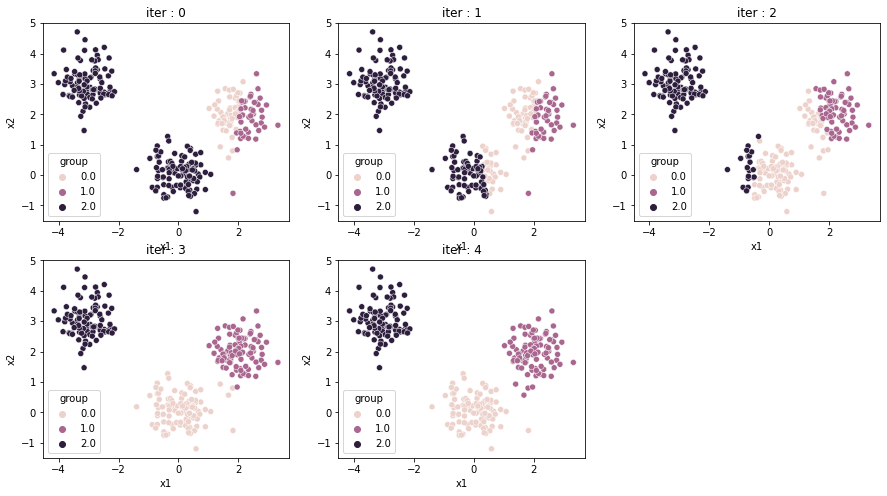

In [10]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')